In [ ]:
import pandas as pd
import numpy as np
import  plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
diabet=pd.read_csv('diabetes.csv')
diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


In [ ]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 635 non-null float64
Glucose                     654 non-null float64
BloodPressure               680 non-null float64
SkinThickness               624 non-null float64
Insulin                     680 non-null float64
BMI                         684 non-null float64
DiabetesPedigreeFunction    590 non-null float64
Age                         655 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [ ]:
null=diabet.isna().sum()
for i in np.arange(0,len(null)):
    print(diabet.columns[i]+' has '+str(null[i])+' null values with '+str(null[i]/len(diabet)*100)+' ratio')


Pregnancies has 133 null values with 17.317708333333336 ratio
Glucose has 114 null values with 14.84375 ratio
BloodPressure has 88 null values with 11.458333333333332 ratio
SkinThickness has 144 null values with 18.75 ratio
Insulin has 88 null values with 11.458333333333332 ratio
BMI has 84 null values with 10.9375 ratio
DiabetesPedigreeFunction has 178 null values with 23.177083333333336 ratio
Age has 113 null values with 14.713541666666666 ratio
Outcome has 0 null values with 0.0 ratio


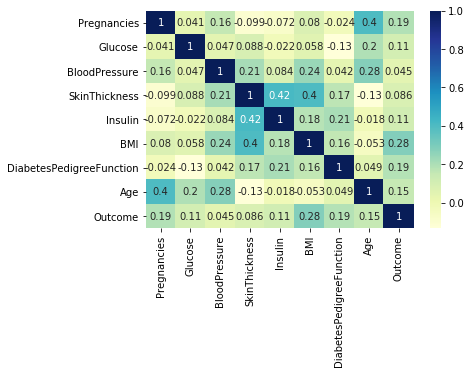

In [ ]:
sns.heatmap(diabet.corr(),cmap='YlGnBu',annot=True)

BMI is the most related featur with outcome also it has a higher relation with  Pregnancies and DiabetesPedigreeFunction

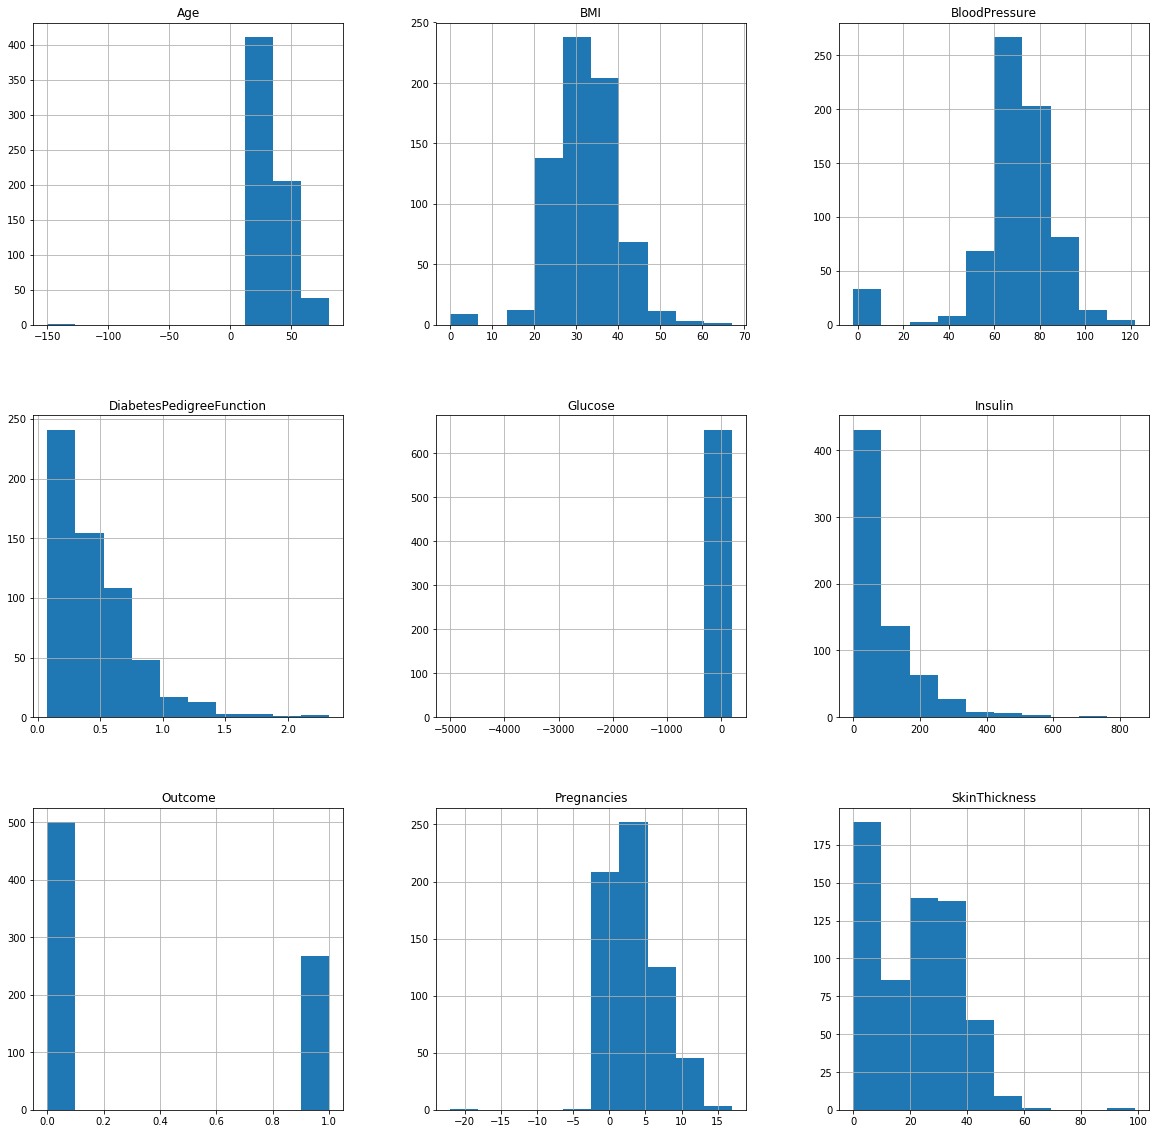

In [ ]:
p = diabet.hist(figsize = (20,20))

سن و تعداد باردای در دیتاست دارای مقادیر منفی هستند که امکان پذیر نیست و دلیل ان خطای ورود اطلاعات است

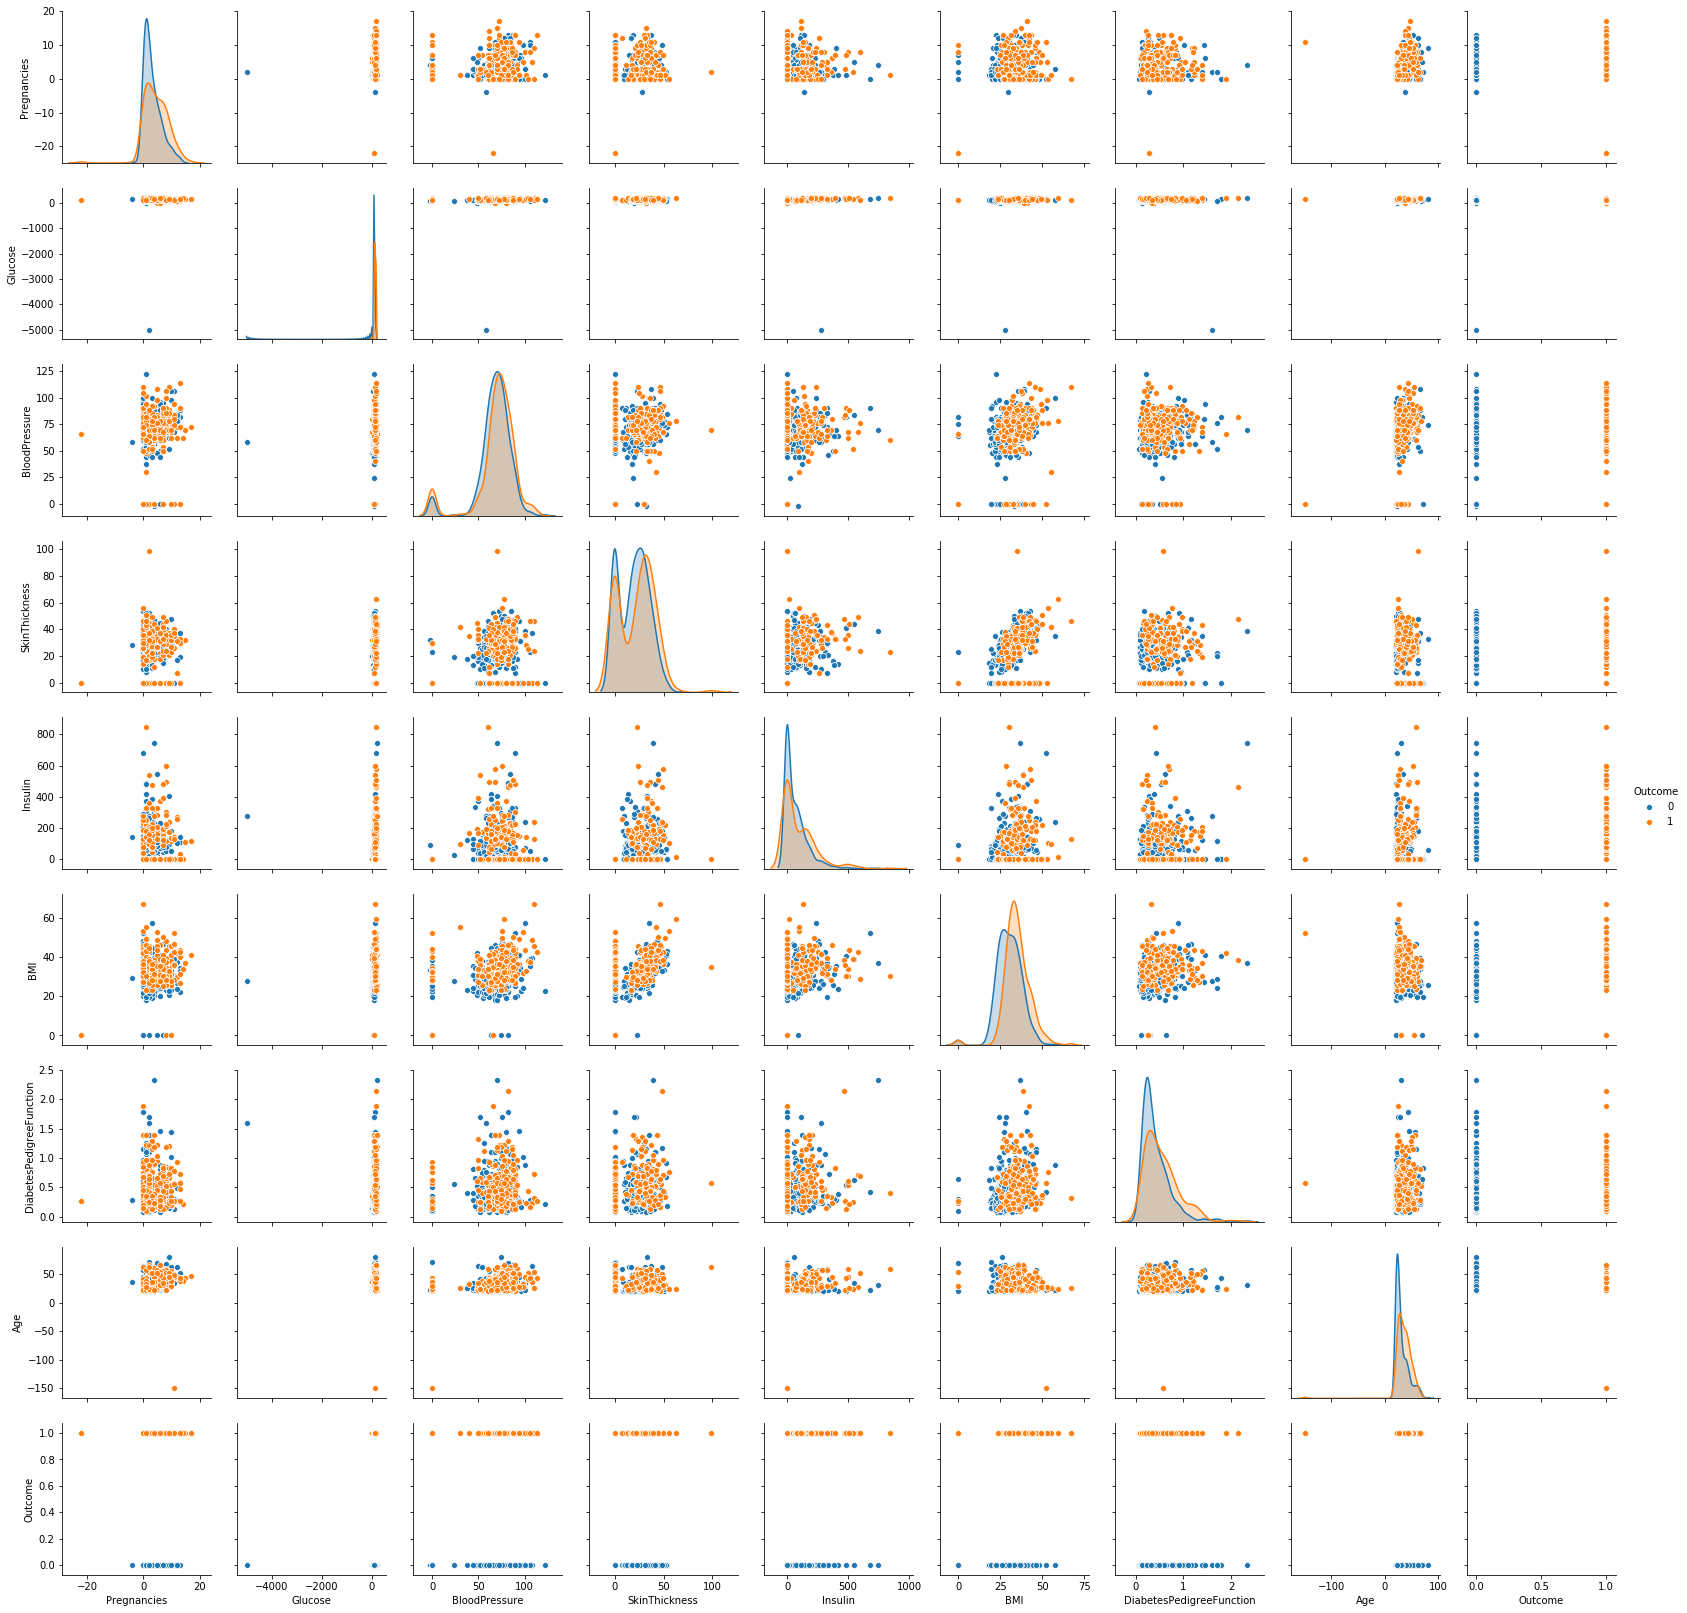

In [ ]:
#from pandas.tools.plotting import scatter_matrix
#p=scatter_matrix(diabete,figsize=(25, 25))
p=sns.pairplot(diabet, hue = 'Outcome')

گلوکز تغییرات و واریانس کمی دارد و اصلا نتوانسته دو خروجی را از هم جدا کند پس گزینه مناسبی برای کاهش ابعاد است

  رابطه خطی و کورولیشن دارد که می توان یکی از انها را حذف کرد چون در برگیرنده اطلاعات دیگری هم هست BMI و SkinThickness




In [ ]:
diabet1=diabet.copy()

#Also in our featuer negetive values are meaningless so we should assumed this as missing values
diabet1[diabet1 < 0] = np.NaN


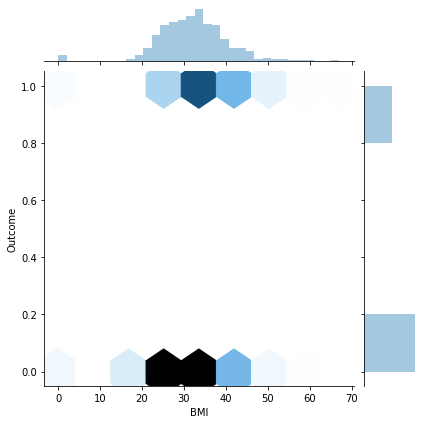

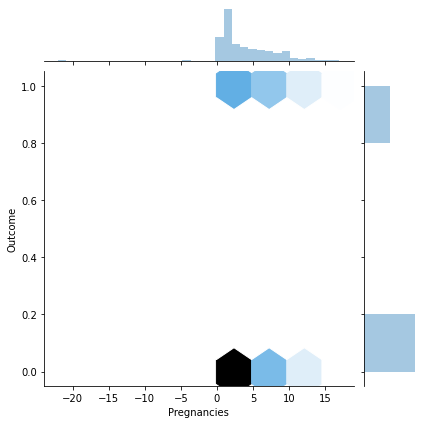

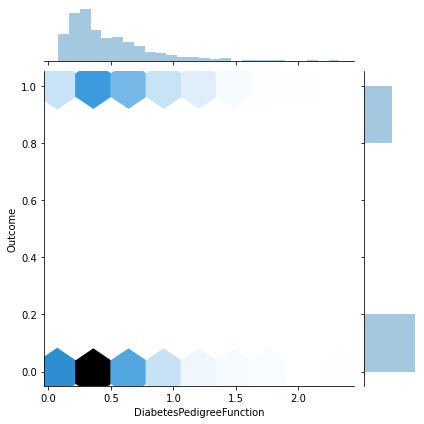

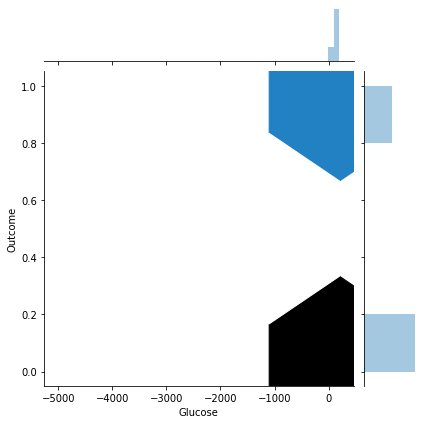

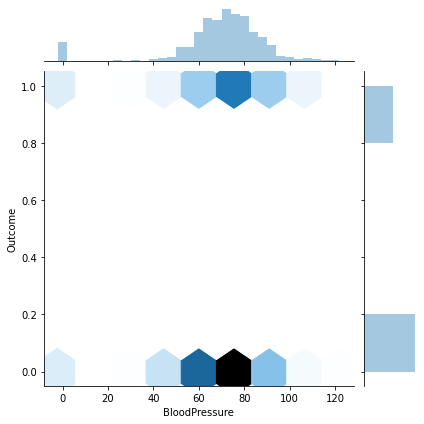

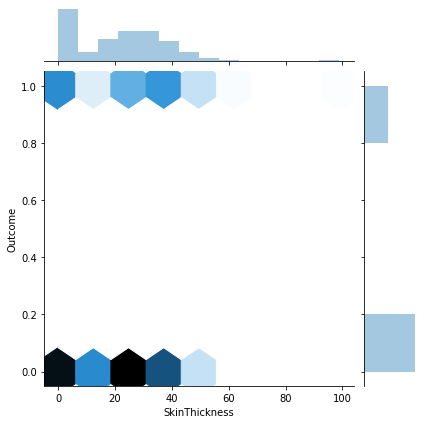

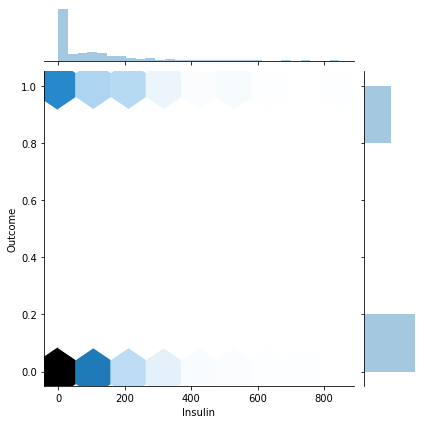

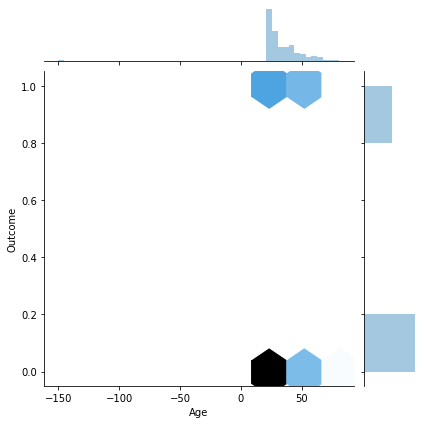

In [ ]:
sns.jointplot(y='Outcome',x='BMI',data=diabet,kind='hex',joint_kws=dict(gridsize=8))
sns.jointplot(y='Outcome',x='Pregnancies',data=diabet,kind='hex',joint_kws=dict(gridsize=8))
sns.jointplot(y='Outcome',x='DiabetesPedigreeFunction',data=diabet,kind='hex',joint_kws=dict(gridsize=8))
sns.jointplot(y='Outcome',x='Glucose',data=diabet,kind='hex',joint_kws=dict(gridsize=2))
sns.jointplot(y='Outcome',x='BloodPressure',data=diabet,kind='hex',joint_kws=dict(gridsize=8))
sns.jointplot(y='Outcome',x='SkinThickness',data=diabet,kind='hex',joint_kws=dict(gridsize=8))
sns.jointplot(y='Outcome',x='Insulin',data=diabet,kind='hex',joint_kws=dict(gridsize=8))
sns.jointplot(y='Outcome',x='Age',data=diabet,kind='hex',joint_kws=dict(gridsize=8))

 1.missing values:

می توان این مقادیر را با مقدار قبلی یا با مقدار بعدی انها در ستون جایگزین کرد این روش بیشتر برای متغغیرهای زمان استفاده می شود همچنین می توان تعداد خانه هایی که با این روش پر می شوند را محدود کرد ولی باید توجه کرد که اولین مقدار و اخرین مقدار ستون خالی هستند یا نه

می توان انها را با مقادیر یک دیتافریم دیگر پر کرد

می توان تمام مقادیر را با یک مقدار ثابت پر کرد البته این که برای هر ستون یک مقدار به عنوان جایگزین کردن انتخاب کنیم بهتر است
البته حذف کل ستون فقط وقتی مناسب است که حدود۷۰ درصد داده های ان ستون نال باشند زیرا تعداد داده زیادتر موجب اموزش بهتر مدل می شود

میتوان با توجه به این که در هر ستون تمامی مقادیر نال هستند یا حداقل یک مقدار نال وجود دارد اون ستون را حذف کرد همچنین می توان یک عدد مشخص کرد که اگر تعداد مقادیر غیر نال حداقل برابر این عدد بود اون ستون حذف نمشود  

dropna(how='any'),     dropna(how='all'),    dropna(thresh= )   


2.

   بیشترین مقدار نال را داد DiabetesPedigreeFunction
   

In [ ]:
diabet1=diabet1.dropna(how='all')
diabet1=diabet1.dropna(thresh=3)


داده ها دارای چولگی راست می باشند که این چولگی را باید از بین ببریم و توزیع را نرمال کنیم

In [ ]:
######
df=diabet1.copy()
diabet1=df.dropna(thresh=7)

In [ ]:
#After cleaning invalid data we check percentage of missing value again
null=diabet1.isna().sum()
for i in np.arange(0,len(null)):
    print(diabet1.columns[i]+' has '+str(null[i])+' null values with '+str(null[i]/len(diabet1)*100)+' ratio')


Pregnancies has 135 null values with 17.578125 ratio
Glucose has 115 null values with 14.973958333333334 ratio
BloodPressure has 89 null values with 11.588541666666668 ratio
SkinThickness has 144 null values with 18.75 ratio
Insulin has 88 null values with 11.458333333333332 ratio
BMI has 84 null values with 10.9375 ratio
DiabetesPedigreeFunction has 178 null values with 23.177083333333336 ratio
Age has 114 null values with 14.84375 ratio
Outcome has 0 null values with 0.0 ratio


In [ ]:
#replace non values with median of each column
diabet1['Pregnancies']=diabet1['Pregnancies'].fillna(diabet1['Pregnancies'].median())
diabet1['Glucose']=diabet1['Glucose'].fillna(diabet1['Glucose'].median())
diabet1['SkinThickness']=diabet1['SkinThickness'].fillna(diabet1['SkinThickness'].median())
diabet1['BMI']=diabet1['BMI'].fillna(diabet1['BMI'].median())
diabet1['DiabetesPedigreeFunction']=diabet1['DiabetesPedigreeFunction'].fillna(diabet1['DiabetesPedigreeFunction'].median())
diabet1['Age']=diabet1['Age'].fillna(diabet1['Age'].median())
diabet1['Insulin']=diabet1['Insulin'].fillna(diabet1['Insulin'].median())
diabet1['BloodPressure']=diabet1['BloodPressure'].fillna(diabet1['BloodPressure'].median())

C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
#round values
diabet1['Pregnancies']=diabet1['Pregnancies'].astype(int)
diabet1['Glucose']=diabet1['Glucose'].astype(int)
diabet1['BloodPressure']=diabet1['BloodPressure'].astype(int)
diabet1['BMI']=diabet1['BMI'].astype(int)
diabet1['SkinThickness']=diabet1['SkinThickness'].astype(int)
diabet1['Insulin']=diabet1['Insulin'].astype(int)
diabet1['Age']=diabet1['Age'].astype(int)
diabet1['DiabetesPedigreeFunction']=np.round(diabet1['DiabetesPedigreeFunction'],1)

C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
#removing outliers
from scipy import stats
diabet1=diabet1[(np.abs(stats.zscore(diabet1)) < 3).all(axis=1)]

In [ ]:
#cheking skew
diabet1.skew().sort_values(ascending=False)

Insulin                     1.397594
DiabetesPedigreeFunction    1.295104
Age                         1.250245
Pregnancies                 0.920955
Glucose                     0.742964
Outcome                     0.741196
BMI                         0.386719
BloodPressure               0.254183
SkinThickness              -0.184407
dtype: float64

برای ستون هایی که چولگی زیادی دارند مقدار صفر را با یک مقدار بسیار کوچک جایگزین می کنیم و این چولگی را تا حد ممکن کم می کنیم

In [ ]:
df1=diabet1.copy()
def nzero(x):
    if x==0:
        return 0.01
    else:
        return x
df1['Insulin']=df1['Insulin'].apply(lambda x:nzero(x))
df1['DiabetesPedigreeFunction']=df1['DiabetesPedigreeFunction'].apply(lambda x:nzero(x))

#removing skewness
from scipy.stats import boxcox
df1['Insulin']=boxcox(df1['Insulin'],0)
df1['DiabetesPedigreeFunction']=boxcox(df1['DiabetesPedigreeFunction'],0)

df1['Age ']=boxcox(df1['Age'],0)
df1=df1.reset_index(drop=True)
df1.skew().sort_values(ascending=False)


Age                         1.250245
Pregnancies                 0.920955
Glucose                     0.742964
Outcome                     0.741196
Age                         0.718577
BMI                         0.386719
BloodPressure               0.254183
SkinThickness              -0.184407
Insulin                    -0.242510
DiabetesPedigreeFunction   -0.281278
dtype: float64

normalizing:

زمانی که واحد ویژگی ها با هم متفاوت است و بعضی از ویژگی ها دارای مقادیر در رنج بزرگ تری نسبت به دیگر ویژگی ها هستند از این روش استفاد می کنیم تا
پیدا کردن ویژگی مهم بهتر انجام شود و بتوان ویژگی ها رو در یک نمودار تحلیل کرد

در اینجا این کار لارم است چون ویژگی های ما دارای واحد های متفاوتی هستند

In [ ]:
#normaliztion
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction','Age']

x=sc_X.fit_transform(df1[columns])
diabet_n=pd.DataFrame(x,columns=columns)
diabet_n.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.882880,0.971246,0.020733,0.978400,-1.142718,0.188915,0.853171,1.659529
1,-0.884656,-1.243202,-0.494999,0.548648,-1.142718,-0.943762,0.127681,-0.123895
2,-0.177642,2.201496,-0.666910,-1.528487,-1.142718,-1.429194,1.128989,-0.030030
3,-0.884656,-1.102602,-0.494999,0.118896,0.859962,-0.620140,-1.112552,-1.062538
4,0.529373,-0.153553,0.192644,-1.528487,0.649858,-1.105572,-1.112552,-0.311623


ویژگی های دسته ای را به فرم عددی کد می کنیم به دو شکل زیر

1.Ordinal encoding :       به هر مقدار منحصر به فرد یک عدد می دهیم که این اعداد دارای ترتیب و الویت نسبت به هم هستند                                                  

2.One-Hot Encoding:        متغییرهای ما نسبت خاصی با هم ندارند پس هر متغییر را به شکل یک رشته باینری کد می کنیم

اگر متغییر هدف ما وابستگی به ویژگی کتگوریکالمان نداشته باشد می توانیم این ویژگی را حذف کنیم در غیراین صورت نیاز است برای استفاده از انها در فرایند ماشین لرنینگ انها را به فرم عددی کد کنیم

بله می توان ستون هایی که بیشتر از ۳۰ درصد مقدار نال دارند را حذف کرد یا ستون هایی که ربط بسیار کمی با متغییر هدف ما دارند یا حتی گاهی از بین دو ستونی که وابستگی زیادی به هم دارند در صورتی که یکی از انها اکثر اطلاعات دیگری را شامل شود، ستون دیگر را حذف می کنیم

انتخاب تعداد داده های تست بستگی دارد به مسئله ی و تعداد داده ای که در اختیار داریم البته معمولا ۲۰ تا ۳۰ درصد داده ها را به عنوان داده های تست و ۷۰ تا ۸۰ درصد را به عنوان train درنظر می گیریم

1.random:  به شکل رندوم نمونه ها را به مجموعه ی تست انتصاب می دهیم این روش برای داده های متعادل جواب می دهد ولی برای داده های نامتعادل دارای بایاس است

2.Stratified: با توجه به تعداد نمونه های هر دسته داده های تست را انتخاب می کند مثلا اگر ۳۰ درصد داده های ما در دسته اول باشن مطمئن می شود ۳۰ درصد داده های تست نیز از دسته ی اول هستند

3.cross_validation:
 داده ها ی تست متفاوتی را چندین بار انتخاب کرده و بین نتایج میانگین گرفته مثلا داده ها را به ۵ قسمت تقسیم کرده و هر بار یک قسمت را به عنوان تست گرفته

validation:
            
معمولا اندازه ان مانند داده های تست است .قسمتی از داده های یادگیری است که همزمان با یادگیری، مدل هر بار روی این مجموعه ارزیابی می شود که باعث جلوگیری از
overfiting شده

In [ ]:
#concat output to normalled dataframe
diabet2=pd.concat([diabet_n,df1['Outcome']],axis=1)

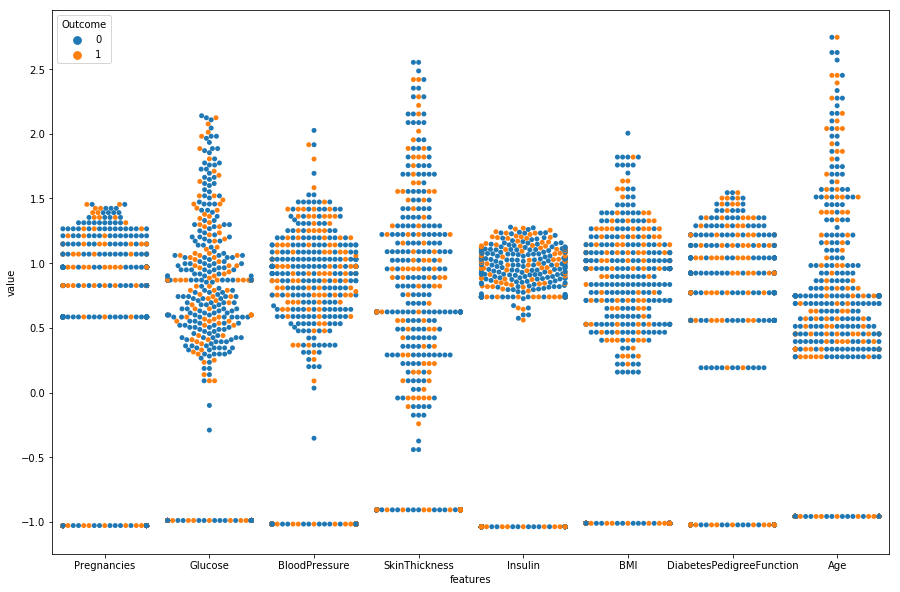

In [ ]:
data = pd.melt(diabet2,id_vars="Outcome",var_name="features",value_name='value')
plt.figure(figsize=(15,10))

sns.swarmplot(x="features", y="value", hue="Outcome", data=data)


گلوکز و انسولین از بقیه از بقیه بهتر نتیجه را جدا کرده اند و دو ویژگی مهم برای کلاس بندی اند و نتیجه ای که قبل از نرمال ساری برای گلوکز گرفتیم اشتباه است

In [ ]:
#outcome is seperated unbalanced
diabet2.groupby("Outcome").count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,402,402,402,402,402,402,402,402
1,195,195,195,195,195,195,195,195


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.3.1


In [ ]:
b=diabet2[diabet2['Outcome']==0].sample(n=438)
#balance with oversampling
a=diabet2[diabet2['Outcome']==1].reset_index(drop=True)
diabet2=pd.concat([b,a.sample(n=219),a],axis=0)
#shuffle dataframe
diabet2=diabet2.sample(frac=1).reset_index(drop=True)
diabet2.groupby("Outcome").count()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,438,438,438,438,438,438,438,438
1,438,438,438,438,438,438,438,438


In [ ]:
#split train and test diabet_n
from sklearn.model_selection import train_test_split
train,test= train_test_split(diabet2,test_size=0.20,random_state=42, stratify=diabet2['Outcome'])


In [ ]:
#reset index and outcome column in test datafram
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
truelabel=test.iloc[:,8:9]
true=np.array(truelabel['Outcome'])
test=test.iloc[:,:8]

In [ ]:
!pip install sklearn

train score is hiegh so there is a possibility of overfitting

In [ ]:
print('accuracy=',(81+28)*100/(81+28+19+26))
a=(28)/(28+19)
print('precision=',a*100)
b=(28)/(28+26)
print('recall=',b*100)
print('f1=',(2*(a*b)/(a+b))*100)

accuracy= 70.77922077922078
precision= 59.57446808510638
recall= 51.85185185185185
f1= 55.44554455445543


precision is low means we say a lot of peaple they have diabete but in reality they didnt have.

train score= 0.8192182410423453 
test score= 0.7012987012987013


C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


<AxesSubplot:>

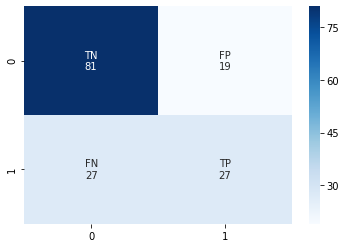

In [ ]:
#K-Nearest-neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn=knn.fit(train.iloc[:,:8],train.iloc[:,8:9])
#predict process
p_knn= knn.predict(test)
print('train score=',knn.score(train.iloc[:,:8],train.iloc[:,8:9]),'\ntest score=',knn.score(test,truelabel))

#confusion_matrix for K-Nearest-neighbors model
mx= confusion_matrix(true,p_knn)
name=['TN','FP','FN','TP']
mx1=mx.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')

In [ ]:
print('accuracy=',(81+27)*100/(81+27+19+27))
a=(27)/(27+27)
print('precision=',a*100)
b=(27)/(27+19)
print('recall=',b*100)
print('f1=',(2*(a*b)/(a+b))*100)


accuracy= 70.12987012987013
precision= 50.0
recall= 58.69565217391305
f1= 54.0


K-Nearest-neighbors had a higher precision than desition trees, means we say more peaple they have diabete but in reality they didnt have, but recall is lower hear and it means we find fewer peaple which they had diabet ,than  K-Nearest-neighbors model. here recall is more important than precision for us.

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devd

train score= 0.7768729641693811 
test score= 0.7402597402597403


<AxesSubplot:>

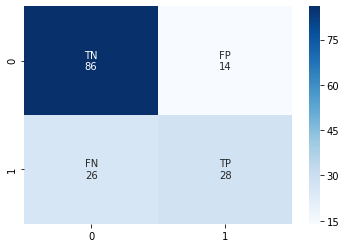

In [ ]:
#LogisticRegression model
from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression()
logistic=logistic.fit(train.iloc[:,:8],train.iloc[:,8:9])
#predict process
p_logistic= logistic.predict(test)
print('train score=',logistic.score(train.iloc[:,:8],train.iloc[:,8:9]),'\ntest score=',logistic.score(test,truelabel))

#confusion_matrix for LogisticRegression model
mx= confusion_matrix(true,p_logistic)
name=['TN','FP','FN','TP']
mx1=mx.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')

In [ ]:
print('accuracy=',(86+28)*100/(86+26+14+28))
a=(28)/(28+14)
print('precision=',a*100)
b=(28)/(26+28)
print('recall=',b*100)
print('f1=',(2*(a*b)/(a+b))*100)

accuracy= 74.02597402597402
precision= 66.66666666666666
recall= 51.85185185185185
f1= 58.333333333333336


LogisticRegression model has the most precision,accuracy and f1.

In [ ]:
#Hyperparameters of Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 50)), 'min_samples_split': [2, 3, 4],'min_impurity_decrease':[0.1,0.2,0.3]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)
clf.fit(train.iloc[:,:8],train.iloc[:,8:9])
clf.fit(train.iloc[:,:8],train.iloc[:,8:9])


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note li

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_split': [2, 3, 4], 'min_impurity_decrease': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:

print("hpyerparameters" ,clf.best_estimator_)
print("accuracy :",lr.best_score_)

hpyerparameters DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.1,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
accuracy : 0.760586319218241


In [ ]:
#Hyperparameters of LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params ={"C":[100,10,1,0.1,0.01], "penalty":["l1","l2"]}
lr= GridSearchCV(LogisticRegression(), params, verbose=1, cv=3)
lr.fit(train.iloc[:,:8],train.iloc[:,8:9])
lr.fit(train.iloc[:,:8],train.iloc[:,8:9])


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note li

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by it

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [100, 10, 1, 0.1, 0.01], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [ ]:
print("hpyerparameters" ,lr.best_params_)
print("accuracy :",lr.best_score_)

hpyerparameters {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.760586319218241


In [ ]:
#find score for different numbers of k points
test_scores = []
train_scores = []

for i in range(1,25):
    knn = KNeighborsClassifier(i)
    knn.fit(train.iloc[:,:8],train.iloc[:,8:9])
    p_knn= knn.predict(test)
    train_scores.append(knn.score(train.iloc[:,:8],train.iloc[:,8:9]))
    test_scores.append(knn.score(test,true))



C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To

Text(0.5, 1.0, 'scor for different numbers of k points')

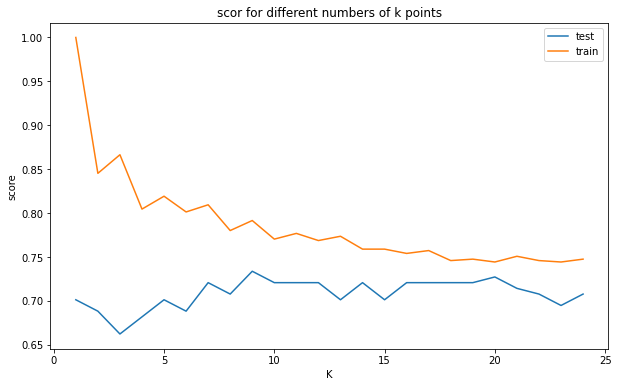

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,25),test_scores,label='test')
plt.plot(np.arange(1,25),train_scores,label='train')
plt.legend(loc="upper right")
plt.xlabel('K')
plt.ylabel('score')
plt.title('scor for different numbers of k points')

In [ ]:
print('train',np.round(train_scores,2),'\n','test',np.round(test_scores,2))

train [1.   0.85 0.87 0.8  0.82 0.8  0.81 0.78 0.79 0.77 0.78 0.77 0.77 0.76
 0.76 0.75 0.76 0.75 0.75 0.74 0.75 0.75 0.74 0.75] 
 test [0.7  0.69 0.66 0.68 0.7  0.69 0.72 0.71 0.73 0.72 0.72 0.72 0.7  0.72
 0.7  0.72 0.72 0.72 0.72 0.73 0.71 0.71 0.69 0.71]


اتفاق می افتد k=9به نظر می رسد بهترین نتیجه در   

overfiting:

زمانی رخ می دهد که جداکننده با دقت زیادی روی داده های اموزش فیت شده است و اصطلاحا می گویند که مدل به جای یادگیری شروع به حفظ کردن که این باعث می شود مدل در ارزیابی داده های جدیدی که قبلا ندیده بسیار بد عمل کند برای مثال اگر در نمودار بالا کمتر از ۵ نقطه ی همسایگی درنظر بگیریم

overfitting رخ می دهد

underfitting:

زمانی که مدل پیچیدگی کمی دارد و دقت خیلی کمی برای جداسازی داده های اموزش به کار برده این مدل خیلی خوب برای داده های تست عمل می کند ولی برای داده های اموزش بد عمل می کند

اتفاق افتاده بود و این اتفاق با انتخاب درست هایپر پارامترها تا حد زیادی حل می شود overfitting در مدل ما خصوصا در بخش درخت تصمیم

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
# decision tree model with cross_validation

clf = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits =5,shuffle=True)
scores_ac = cross_val_score(clf, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='accuracy')
scores_re = cross_val_score(clf, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='recall')
scores_pr = cross_val_score(clf, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='precision')
scores_f1 = cross_val_score(clf, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='f1')

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20;

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_ac.mean(), scores_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_re.mean(), scores_re.std()))
print("%0.2f precision with a standard deviation of %0.2f" % (scores_pr.mean(), scores_pr.std()))
print("%0.2f f1 with a standard deviation of %0.2f" % (scores_f1.mean(), scores_f1.std()))

0.68 accuracy with a standard deviation of 0.02
0.57 recall with a standard deviation of 0.06
0.60 precision with a standard deviation of 0.09
0.53 f1 with a standard deviation of 0.03


we have a better precision with k_fold train, test split in decision tree model

In [ ]:
# K-Nearest-neighbors model with cross_validation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_folds = KFold(n_splits =5,shuffle=True)
scores_ac = cross_val_score(knn, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='accuracy')
scores_re = cross_val_score(knn, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='recall')
scores_pr = cross_val_score(knn, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='precision')
scores_f1 = cross_val_score(knn, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='f1')

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20;

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWar

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_ac.mean(), scores_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_re.mean(), scores_re.std()))
print("%0.2f precision with a standard deviation of %0.2f" % (scores_pr.mean(), scores_pr.std()))
print("%0.2f f1 with a standard deviation of %0.2f" % (scores_f1.mean(), scores_f1.std()))

0.72 accuracy with a standard deviation of 0.06
0.47 recall with a standard deviation of 0.05
0.62 precision with a standard deviation of 0.08
0.56 f1 with a standard deviation of 0.04


we have a better precision and accuracy with k_fold train, test split in K-Nearest-neighbors model

In [ ]:
# LogisticRegression model with cross_validation

from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression()

k_folds = KFold(n_splits =5,shuffle=True)
scores_ac = cross_val_score(logistic, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='accuracy')
scores_re = cross_val_score(logistic, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='recall')
scores_pr = cross_val_score(logistic, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='precision')
scores_f1 = cross_val_score(logistic, diabet2.iloc[:,:8], diabet2.iloc[:,8:9], cv = k_folds,scoring='f1')

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=T

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_ac.mean(), scores_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_re.mean(), scores_re.std()))
print("%0.2f precision with a standard deviation of %0.2f" % (scores_pr.mean(), scores_pr.std()))
print("%0.2f f1 with a standard deviation of %0.2f" % (scores_f1.mean(), scores_f1.std()))

0.77 accuracy with a standard deviation of 0.01
0.53 recall with a standard deviation of 0.09
0.71 precision with a standard deviation of 0.06
0.60 f1 with a standard deviation of 0.07


we have a better precision,accuracy, recall and f1 with k_fold train, test split in logistic regression model

In [ ]:
#random forest moldel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train.iloc[:,:8],train.iloc[:,8:9])
pclf=clf.predict(test)


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [ ]:

from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score

print("%0.2f accuracy" % accuracy_score(true,pclf))
print("%0.2f recall" % recall_score(true,pclf))
print("%0.2f precision" % precision_score(true,pclf))
print("%0.2f f1" % f1_score(true,pclf))

0.71 accuracy
0.43 recall
0.64 precision
0.51 f1


In [ ]:
#find score for different numbers of max_depth

test_scores = []
train_scores = []
depth= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ,None]
for i in range(0,len(depth)):

    clf = RandomForestClassifier(max_depth=depth[i])
    clf.fit(train.iloc[:,:8],train.iloc[:,8:9])
    pclf=clf.predict(test)

    train_scores.append(clf.score(train.iloc[:,:8],train.iloc[:,8:9]))
    test_scores.append(clf.score(test,true))



C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://nump

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://nump

C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias

C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

Text(0.5, 1.0, 'scor for different max_depths')

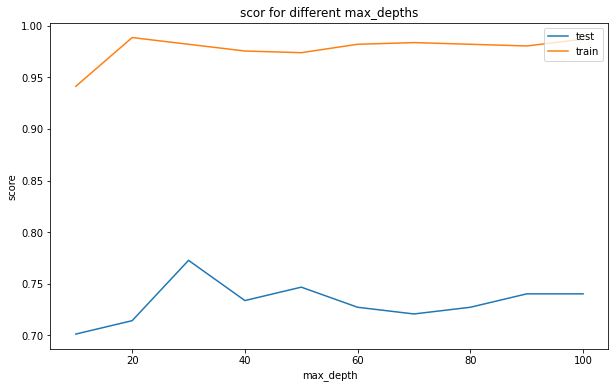

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(depth,test_scores,label='test')
plt.plot(depth,train_scores,label='train')
plt.legend(loc="upper right")
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('scor for different max_depths')

In [ ]:
print('train',np.round(train_scores,2),'\n','test',np.round(test_scores,2))

train [0.94 0.99 0.98 0.98 0.97 0.98 0.98 0.98 0.98 0.99 0.99] 
 test [0.7  0.71 0.77 0.73 0.75 0.73 0.72 0.73 0.74 0.74 0.7 ]


اگر عمق بیشینه ای برای درختان انتخاب نکنیم عمل شکستن تا خلوص کامل برگ ها پیش می رود و ممکن است باعث

overfitting شود

 در شکل بالا اگر عمق را محدود به ۳۰ کنیم بهترین نتیجه را داریم

In [ ]:
#find score for different numbers of min_impurity_decreas
test_scores = []
train_scores = []

for i in [0,0.01,0.02,0.03,0.04]:

    clf = RandomForestClassifier(min_impurity_decrease=i)
    clf.fit(train.iloc[:,:8],train.iloc[:,8:9])
    pclf=clf.predict(test)

    train_scores.append(clf.score(train.iloc[:,:8],train.iloc[:,8:9]))
    test_scores.append(clf.score(test,true))


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

Text(0.5, 1.0, 'scor for different min_impurity_decrease')

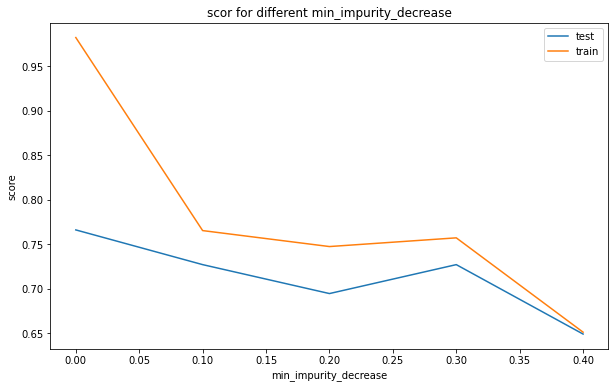

In [ ]:
plt.figure(figsize=(10,6))
plt.plot([0,0.1,0.2,0.3,0.4],test_scores,label='test')
plt.plot([0,0.1,0.2,0.3,0.4],train_scores,label='train')
plt.legend(loc="upper right")
plt.xlabel('min_impurity_decrease')
plt.ylabel('score')
plt.title('scor for different min_impurity_decrease')

In [ ]:
print('train',train_scores,'\n','test',test_scores)

train [0.9820846905537459, 0.7654723127035831, 0.747557003257329, 0.757328990228013, 0.6514657980456026] 
 test [0.7662337662337663, 0.7272727272727273, 0.6948051948051948, 0.7272727272727273, 0.6493506493506493]


 بهترین نتیجه زمانی حاصل شده که مقدار ناخالصی برای تمام کردن شکستن هر نود برابر با صفر بوده

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=30)
clf1.fit(train.iloc[:,:8],train.iloc[:,8:9])
pclf1=clf1.predict(test)


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Noname\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

In [ ]:

print("%0.2f accuracy" % accuracy_score(true,pclf1))
print("%0.2f recall" % recall_score(true,pclf1))
print("%0.2f precision" % precision_score(true,pclf1))
print("%0.2f f1" % f1_score(true,pclf1))

0.74 accuracy
0.48 recall
0.68 precision
0.57 f1


In [ ]:
print('train score=',clf1.score(train.iloc[:,:8],train.iloc[:,8:9]),'\ntest score=',clf1.score(test,truelabel))

train score= 0.9820846905537459 
test score= 0.7402597402597403


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link fo

all parameters except recall are higher in random forest than decision tree

واریانس مربوط به خطای پیشبینی برای مجموعه تست می شود درحالی که بایاس مربوط به خطای پیشبینی در داداه ها اموزش است یک مصالحه بین بایاس و واریانس برقرار است که با زیاد کردن یکی مقدار دیگریکم می شود از لحاظ بایاس درخت تصمیم و از لحاظ واریانس جنگل تصادفی بهتر عمل می کنند این فرضیه در اینجا هم تایید شده زیرا درخت تصمیم دقتی برابر یک در مجموعه اموزش دارد حال انکه این دقت در جنگل تصادفی برابر ۰.۹۸ است ولی جنگل تصادفی دقت ۰.۷۴ را برای داده های تست بدست اورده ولی این مقدار برای درخت تصمیم ۰.۷ بوده